In [4]:
from nba_api.stats.endpoints import commonplayerinfo
from nba_api.stats.endpoints._base import Endpoint
from nba_api.stats.library.http import NBAStatsHTTP
from nba_api.stats.endpoints import playerdashboardbyteamperformance
from nba_api.stats.endpoints import leaguedashplayerstats
from nba_api.stats.endpoints import teamdashboardbyteamperformance
from nba_api.stats.endpoints import playerdashboardbylastngames
from nba_api.stats.endpoints import playerdashboardbyyearoveryear
from nba_api.stats.endpoints import teamdashboardbylastngames
from nba_api.stats.endpoints import teamplayerdashboard
from nba_api.stats.static import teams
from nba_api.stats.static import players
import pandas as pd
import inspect
import numpy as np
import csv
import sys

import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

headers = { 'Host': 'stats.nba.com', 'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:61.0) Gecko/20100101 Firefox/61.0', 'Accept': 'application/json, text/plain, /', 'Accept-Language': 'en-US,en;q=0.5', 'Referer': 'https://stats.nba.com/', 'Accept-Encoding': 'gzip, deflate, br', 'Connection': 'keep-alive', }

In [18]:
#Player Input

player1_input = input('Enter player 1: ')
print(player1_input)

player1 = players.find_players_by_full_name(player1_input)[0]['id']
player1_name = players.find_players_by_full_name(player1_input)[0]['full_name']

player_info = playerdashboardbylastngames.PlayerDashboardByLastNGames(player_id=player1, 
                                                                      season='2018-19', headers=headers)

# player_headers = player_info.by_year_player_dashboard.get_dict().get('headers')
# player_data = player_info.overall_player_dashboard.get_dict().get('data')[0]

# #last 20 games
player_headers = player_info.last20_player_dashboard.get_dict().get('headers')
player_data = player_info.last20_player_dashboard.get_dict().get('data')[0]

print(player_headers[5], player_data[5], 
	player_headers[2], player_data[2], 
	player_headers[26], player_data[26],
	player_headers[27], player_data[27])

Enter player 1: lebron james
lebron james
W_PCT 0.35 GP 20 PTS 553 PLUS_MINUS 19


In [19]:
#Team Input

team1_input = input('Enter team 1: ')
print(team1_input)
team1 = teams.find_teams_by_full_name(team1_input)[0]['id']

teamdashboard = teamdashboardbylastngames.TeamDashboardByLastNGames(team_id=team1, season='2018-19', last_n_games=1, 
                                                                   headers=headers)
teamdashboard_adv = teamdashboardbylastngames.TeamDashboardByLastNGames(team_id=team1, season='2018-19', 
                                                                    measure_type_detailed_defense='Advanced', 
                                                                        last_n_games=1, headers=headers)

##last n games
team_headers_basic = teamdashboard.overall_team_dashboard.get_dict().get('headers')
team_data_basic = teamdashboard.overall_team_dashboard.get_dict().get('data')[0]
team_headers = teamdashboard_adv.overall_team_dashboard.get_dict().get('headers')
team_data = teamdashboard_adv.overall_team_dashboard.get_dict().get('data')[0]

##last 20 games
# team_headers_basic = teamdashboard.last20_team_dashboard.get_dict().get('headers')
# team_data_basic = teamdashboard.last20_team_dashboard.get_dict().get('data')[0]
# team_headers = teamdashboard_adv.last20_team_dashboard.get_dict().get('headers')
# team_data = teamdashboard_adv.last20_team_dashboard.get_dict().get('data')[0]

print(team1, team_headers, team_data)
# print(team1, team_headers[23], team_data[23], team_headers[8], team_data[8], team_headers[10], team_data[10], 
#       team_headers[2], team_data[2], team_headers[3], team_data[3], 
#       team_headers[4], team_data[4], team_headers[21], team_data[21], team_headers[6], team_data[6])

Enter team 1: lakers
lakers
1610612747 ['GROUP_SET', 'GROUP_VALUE', 'GP', 'W', 'L', 'W_PCT', 'MIN', 'E_OFF_RATING', 'OFF_RATING', 'E_DEF_RATING', 'DEF_RATING', 'E_NET_RATING', 'NET_RATING', 'AST_PCT', 'AST_TO', 'AST_RATIO', 'OREB_PCT', 'DREB_PCT', 'REB_PCT', 'TM_TOV_PCT', 'EFG_PCT', 'TS_PCT', 'E_PACE', 'PACE', 'PACE_PER40', 'POSS', 'PIE', 'GP_RANK', 'W_RANK', 'L_RANK', 'W_PCT_RANK', 'MIN_RANK', 'OFF_RATING_RANK', 'DEF_RATING_RANK', 'NET_RATING_RANK', 'AST_PCT_RANK', 'AST_TO_RANK', 'AST_RATIO_RANK', 'OREB_PCT_RANK', 'DREB_PCT_RANK', 'REB_PCT_RANK', 'TM_TOV_PCT_RANK', 'EFG_PCT_RANK', 'TS_PCT_RANK', 'PACE_RANK', 'PIE_RANK', 'CFID', 'CFPARAMS'] ['Overall', '2018-19', 1, 0, 1, 0.0, 48.0, 99.5, 102.0, 101.3, 105.1, -1.8, -3.0, 0.725, 1.71, 19.5, 0.393, 0.704, 0.545, 0.172, 0.479, 0.498, 102.1, 99.0, 82.5, 99, 0.486, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 163, '2018-19']


In [20]:
roster1 = teamplayerdashboard.TeamPlayerDashboard(team_id=team1, last_n_games=1, 
                                                  season='2018-19', headers=headers).get_dict()#.PlayersSeasonTotals(team_id=team1, last_n_games=20)
team1_roster_last20 = []
team1_roster_lastn = []
#print(roster1)['resultSets'][1])#['rowSet'])
for n in roster1['resultSets'][1]['rowSet']:
    print(n[2], 'GP:', n[3], 'id:', n[1], 'Min', n[7])
    team1_roster_lastn.append(n[2])
    
print(team1_roster_lastn)
#(PER * MP)/n_players

Alex Caruso GP: 1 id: 1627936 Min 40.56666666666667
Isaac Bonga GP: 1 id: 1629067 Min 9.08
JaVale McGee GP: 1 id: 201580 Min 19.416666666666668
Jemerrio Jones GP: 1 id: 1629203 Min 46.483333333333334
Johnathan Williams GP: 1 id: 1629140 Min 28.583333333333332
Kentavious Caldwell-Pope GP: 1 id: 203484 Min 43.95
Mike Muscala GP: 1 id: 203488 Min 35.403333333333336
Moritz Wagner GP: 1 id: 1629021 Min 16.516666666666666
['Alex Caruso', 'Isaac Bonga', 'JaVale McGee', 'Jemerrio Jones', 'Johnathan Williams', 'Kentavious Caldwell-Pope', 'Mike Muscala', 'Moritz Wagner']


In [114]:
def off_per_calculator(player, team):
    
    agg_PER = 0 
    agg_adj_PER = 0
    num_players = 0
    PER_MP = 0
    agg_min = 0
    
    for n in player:
        p_id = players.find_players_by_full_name(n)[0]['id']
        p_info = playerdashboardbylastngames.PlayerDashboardByLastNGames(player_id=p_id, season='2018-19',
                                                                        last_n_games=1, headers=headers)
        
        ##last 20 games        
#         player_headers = p_info.last20_player_dashboard.get_dict().get('headers')
#         player_data = p_info.last20_player_dashboard.get_dict().get('data')[0]
        
        player_headers = p_info.overall_player_dashboard.get_dict().get('headers')
        player_data = p_info.overall_player_dashboard.get_dict().get('data')[0]

 
    #####PER player stats####
        MP = player_data[6]
        ThrP = player_data[10] 
        AST = player_data[19]
        TOV = player_data[20]
        FGA = player_data[8]
        FG = player_data[7] + player_data[10] 
        FTA = player_data[14]
        FT = player_data[13]
        TRB = player_data[18]
        ORB = player_data[16]
        STL = player_data[21]
        BLK = player_data[22]
        PF = player_data[24]

    ###PER league stats (2018-19)###
        lg_AST = 24.6
        lg_FG = 41.1
        lg_PTS = 111.2
        lg_FGA = 89.2
        lg_FT = 17.7
        lg_FTA = 23.1
        lg_TRB = 45.2
        lg_ORB = 10.3
        lg_TOV = 14.1
        lg_PF = 20.9
        lg_pace = 100
        
    ###PER team stats###
        team_AST = team_data_basic[19]
        team_FG = team_data_basic[7]+team_data_basic[10]
        team_pace = team_data[23] 
       
        factor = (2/3) - (0.5*(lg_AST/lg_FG)) / (2*(lg_FG/lg_FT)) 
        VOP = lg_PTS / (lg_FGA-lg_ORB+lg_TOV+0.44*lg_FTA) 
        DRB_perc = (lg_TRB -lg_ORB) / lg_TRB

    ####PER Calculation####                    
        PER_calc_player = (1 / MP) * ( ThrP + (2/3) * AST 
                                      + (2 - factor * (team_AST / team_FG)) * FG 
                                      + (FT *0.5 * (1 + (1 - (team_AST / team_FG)) + (2/3) * (team_AST / team_FG)))
                                      - VOP * TOV - VOP * DRB_perc * (FGA - FG)
                                      - VOP * 0.44 * (0.44 + (0.56 * DRB_perc)) * (FTA - FT)
                                      + VOP * (1 - DRB_perc) * (TRB - ORB) + VOP * DRB_perc * ORB 
                                      + VOP * STL + VOP * DRB_perc * BLK - PF 
                                      * ((lg_FT / lg_PF) - 0.44 * (lg_FTA / lg_PF) * VOP) )

        adj_PER_calc_player = PER_calc_player * (lg_pace /team_pace)
        
        agg_PER += PER_calc_player 
        agg_adj_PER += adj_PER_calc_player
        num_players +=1
        PER_MP += (adj_PER_calc_player * MP)
        PER_MP_n = PER_MP/num_players
        
        print(n, 'Min', MP, 'adj_PER_calc_player', adj_PER_calc_player, 'PER*MP_Player', (adj_PER_calc_player*MP))
        
    print('Agg_PER * MP', PER_MP)
    
    print('PERxMP/n', PER_MP_n, 'Total PER', agg_PER, 'Total adj_PER', agg_adj_PER)
    print('team ast', team_AST, 'team FG', team_FG, 'team_pace', team_pace)
#    print('league stats:', factor, VOP, DRB_perc)

In [115]:
off_per_calculator(team1_roster_lastn, team1)

Danilo Gallinari Min 24.8 adj_PER_calc_player 0.426271056923702 PER*MP_Player 10.57152221170781
Garrett Temple Min 21.583333333333332 adj_PER_calc_player 0.3514380730823768 PER*MP_Player 7.585205077361299
Ivica Zubac Min 29.783333333333335 adj_PER_calc_player 0.6585686980390959 PER*MP_Player 19.61437105659774
JaMychal Green Min 25.333333333333332 adj_PER_calc_player 0.5061284203324381 PER*MP_Player 12.821919981755098
Jerome Robinson Min 16.45 adj_PER_calc_player 0.22087037238040508 PER*MP_Player 3.6333176256576634
Landry Shamet Min 29.416666666666668 adj_PER_calc_player 0.5033830669166712 PER*MP_Player 14.807851885132079
Lou Williams Min 23.316666666666666 adj_PER_calc_player 0.3062138270859272 PER*MP_Player 7.139885734886869
Montrezl Harrell Min 20.816666666666666 adj_PER_calc_player 0.9940717283930562 PER*MP_Player 20.693259812715453
Patrick Beverley Min 21.316666666666666 adj_PER_calc_player 1.013862675943175 PER*MP_Player 21.612172708855347
Shai Gilgeous-Alexander Min 24.1 adj_PER_

In [21]:
#Alternate Offensive Rating

def off_per_calc_alt(player, team):
    
    agg_off_rating = 0
    agg_min = 0

    player_info_off = leaguedashplayerstats.LeagueDashPlayerStats(last_n_games=5, season='2018-19', 
                                                                  measure_type_detailed_defense='Advanced', 
                                                                  headers=headers)

    player_off_headers = player_info_off.league_dash_player_stats.get_dict().get('headers')
    player_off_data = player_info_off.league_dash_player_stats.get_dict().get('data')

#     print('headers:', player_off_headers)
    #print('data:', player_def_data)

    for p in team1_roster_lastn:
        for n in player_off_data:
            if p in n:
                print(n[1], '\n', 'E_Off_Rating', n[10], 'Min', n[9])
                agg_off_rating += (n[10]*n[9])
                agg_min += n[9]

    avg_off_rating = agg_off_rating/len(team1_roster_lastn)

    print('agg_off_rating', agg_off_rating, 'avg_off_rating', avg_off_rating, 'agg_min', agg_min, 
          'agg_off_rat_min', agg_off_rating/agg_min) 

In [107]:
#Individual Player Defense Stats

def def_per_calc(team_roster):
    agg_def_rating = 0
    agg_min = 0

    # player_info_def = leaguedashplayerstats.LeagueDashPlayerStats(last_n_games=1, season='2018-19', 
    #                                                                   measure_type_detailed_defense='Defense')
    player_info_def = leaguedashplayerstats.LeagueDashPlayerStats(opponent_team_id=, month=4, season='2018-19', 
                                                                      measure_type_detailed_defense='Defense',
                                                                 headers=headers)



    player_def_headers = player_info_def.league_dash_player_stats.get_dict().get('headers')
    player_def_data = player_info_def.league_dash_player_stats.get_dict().get('data')

    print('headers:', player_def_headers)
        #print('data:', player_def_data)

    for p in team1_roster_lastn:
        for n in player_def_data:
            if p in n:
                print(n[1], '\n', 'Def Rating', n[10], 'Min', n[9])
                agg_def_rating += (n[10]*n[9])
                agg_min += n[9]


    avg_def_rating = agg_def_rating/len(team1_roster)
    avg_def_rating_min = agg_def_rating/agg_min

    print('agg_def_rating', agg_def_rating, 'avg_def_rating', avg_def_rating, 'agg_min', agg_min) 
    print('avg_def_rating_min', avg_def_rating_min)

In [4]:
def off_per_calculator_pandas(player, team):
    
    agg_PER = 0 
    agg_adj_PER = 0
    num_players = 0
    PER_MP = 0
    agg_min = 0

    
    for n in player:
#         p_id = players.find_players_by_full_name(n)[0]['id']
#         p_info = playerdashboardbylastngames.PlayerDashboardByLastNGames(player_id=p_id, season='2018-19',
#                                                                         last_n_games=1)
        
#         ##last 20 games        
# #         player_headers = p_info.last20_player_dashboard.get_dict().get('headers')
# #         player_data = p_info.last20_player_dashboard.get_dict().get('data')[0]
        
#         player_headers = p_info.overall_player_dashboard.get_dict().get('headers')
#         player_data = p_info.overall_player_dashboard.get_dict().get('data')[0]

 
    #####PER player stats####
        MP = team1_roster['MINUTES']
        ThrP = team1_roster['3PMa'] 
        AST = team1_roster['AST']
        TOV = team1_roster['TOV']
        FGA = team1_roster['FGA']
        FG = team1_roster['FGM'] 
        FTA = team1_roster['FTA']
        FT = team1_roster['FTM']
        TRB = team1_roster['REB']
        ORB = team1_roster['OREB']
        STL = team1_roster['STL']
        BLK = team1_roster['BLK']
        PF = team1_roster['PF']

    ###PER league stats (2018-19)###
        lg_AST = 24.6
        lg_FG = 41.1
        lg_PTS = 111.2
        lg_FGA = 89.2
        lg_FT = 17.7
        lg_FTA = 23.1
        lg_TRB = 45.2
        lg_ORB = 10.3
        lg_TOV = 14.1
        lg_PF = 20.9
        lg_pace = 100
        
    ###PER team stats###
        team_AST = 25.6
        team_FG = 42.6
        team_pace = 103.6
       
        factor = (2/3) - (0.5*(lg_AST/lg_FG)) / (2*(lg_FG/lg_FT)) 
        VOP = lg_PTS / (lg_FGA-lg_ORB+lg_TOV+0.44*lg_FTA) 
        DRB_perc = (lg_TRB -lg_ORB) / lg_TRB

    ####PER Calculation####                    
        PER_calc_player = (1 / MP) * ( ThrP + (2/3) * AST 
                                      + (2 - factor * (team_AST / team_FG)) * FG 
                                      + (FT *0.5 * (1 + (1 - (team_AST / team_FG)) + (2/3) * (team_AST / team_FG)))
                                      - VOP * TOV - VOP * DRB_perc * (FGA - FG)
                                      - VOP * 0.44 * (0.44 + (0.56 * DRB_perc)) * (FTA - FT)
                                      + VOP * (1 - DRB_perc) * (TRB - ORB) + VOP * DRB_perc * ORB 
                                      + VOP * STL + VOP * DRB_perc * BLK - PF 
                                      * ((lg_FT / lg_PF) - 0.44 * (lg_FTA / lg_PF) * VOP) )

        adj_PER_calc_player = PER_calc_player * (lg_pace /team_pace)
        
        agg_PER += PER_calc_player 
        agg_adj_PER += adj_PER_calc_player
        num_players +=1
        PER_MP = adj_PER_calc_player * MP
        PER_MP_n += PER_MP
        
        print(n, 'Min', MP, 'adj_PER_calc_player', adj_PER_calc_player, 'PER*MP_Player', (adj_PER_calc_player*MP))
        
    print('Agg_PER * MP_n', PER_MP)
    
#     print('PERxMP/n', PER_MP_n, 'Total PER', agg_PER, 'Total adj_PER', agg_adj_PER)
    print('team ast', team_AST, 'team FG', team_FG, 'team_pace', team_pace)
#    print('league stats:', factor, VOP, DRB_perc)

In [82]:
data = pd.read_csv("NBA Merged Sheets - Sheet2.csv") 
data_t = pd.read_csv("team_stats_basic_2018-19.csv")
df = pd.read_csv("team 2018-19.csv") 

teams = ['ATL', 'IND', 'MIL', 'ORL', 'PHI', 'SAS', 'POR', 'NOP', 'UTA', 'HOU', 'BOS', 
         'MEM', 'BKN', 'MIA', 'CHI', 'MIN', 'PHX', 'DET', 'NYK', 'LAL', 'CHA', 'TOR', 
         'WAS', 'SAC', 'LAC', 'OKC', 'CLE', 'DAL', 'DEN', 'GSW']

In [141]:
def regression(team1):
    
    with open('regression_list.csv', 'a', newline='') as csvFile:
        writer = csv.writer(csvFile)
        headers = ['Team1','T1_OR5', 'T1_DR5', 'Team2', 'T2_OR5', 'T2_DR5', 'Spread', 'TScore']
        writer.writerow(headers)
    csvFile.close() 
    
    team2 = []
    date = []

    score = []

    df2 = df[['Team', 'Matchup', 'Date', 'OffRtg', 'DefRtg', 'ASTRatio', 'PACE']]
    df2 = df[df['Team'] == team1]

    opp = []

    team2 = df2['Matchup']

    for row in team2:
        opp.append(row.replace(team1+'vs.', '').replace(team1+'@', ''))

    df2['Opp'] = opp

    team1_off_avg = 0
    team1_def_avg = 0

    team2_off_avg = 0
    team2_def_avg = 0
    totalscore = 0

    for index, row in df2.head(n=77).iterrows(): 
        whole_row = []
        team2 = row['Opp']
        date = row['Date']
        df3 = df[df['Team'] == team2]

        score = data.loc[(data['DATE']==date) & (data['TEAM']==team1)]
        score = score.iloc[0]
        score = (score["team_pts"], score['team_plus_minus'])
        print('===', row['Team'], row['OffRtg'], row['DefRtg'], 
              row['Date'], row['Opp'], score, "===") 
                
        print(row['Team'], 'Last5_Off', row['Last5_Off'], 'Last5_Def', row['Last5_Def'])
        whole_row.append(row['Team'])
        whole_row.append(row['Last5_Off'])
        whole_row.append(row['Last5_Def'])

        df3 = df3.loc[df3['Date'] == date]
        for index, row in df3.iterrows():
            print(row['Team'], 'Last5_Off', row['Last5_Off'], 'Last5_Def', row['Last5_Def'], '\n')
            whole_row.append(row['Team'])
            whole_row.append(row['Last5_Off'])
            whole_row.append(row['Last5_Def'])
            whole_row.append(score[1])
            whole_row.append(score[0]-score[1]+score[0])
            
            with open('regression_list.csv', 'a') as csvFile:
                writer = csv.writer(csvFile)
                writer.writerow(whole_row)
            csvFile.close() 
    


In [142]:
for team in teams:
    regression(team)

/Users/stan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


=== ATL 122.9 125.0 04/10/19 IND (134, -1.0) ===
ATL Last5_Off 110.22 Last5_Def 117.62
IND Last5_Off 108.68 Last5_Def 110.44 

=== ATL 99.1 106.5 04/07/19 MIL (107, -8.0) ===
ATL Last5_Off 110.0 Last5_Def 119.68
MIL Last5_Off 118.16 Last5_Def 113.78 

=== ATL 102.7 134.2 04/05/19 ORL (113, -36.0) ===
ATL Last5_Off 112.46 Last5_Def 113.9
ORL Last5_Off 111.9 Last5_Def 113.6 

=== ATL 126.2 118.4 04/03/19 PHI (130, 8.0) ===
ATL Last5_Off 110.68 Last5_Def 113.52
PHI Last5_Off 110.46 Last5_Def 114.72 

=== ATL 108.8 113.6 04/02/19 SAS (111, -6.0) ===
ATL Last5_Off 111.0 Last5_Def 112.52
SAS Last5_Off 113.02 Last5_Def 111.18 

=== ATL 114.3 115.4 03/31/19 MIL (136, 1.0) ===
ATL Last5_Off 108.94 Last5_Def 113.4
MIL Last5_Off 114.66 Last5_Def 101.26 

=== ATL 98.0 116.8 03/29/19 POR (98, -20.0) ===
ATL Last5_Off 106.5 Last5_Def 109.1
POR Last5_Off 121.96 Last5_Def 112.64 

=== ATL 115.0 105.3 03/26/19 NOP (130, 10.0) ===
ATL Last5_Off 106.36 Last5_Def 112.62
NOP Last5_Off 103.12 Last5_Def 114.

=== ATL 106.5 125.9 10/30/18 CLE (114, -22.0) ===
ATL Last5_Off 100.12 Last5_Def 102.9
CLE Last5_Off 106.18 Last5_Def 118.62 

=== ATL 83.6 103.7 10/29/18 PHI (92, -21.0) ===
ATL Last5_Off 102.34 Last5_Def 104.66
PHI Last5_Off 112.08 Last5_Def 111.24 

=== IND 125.0 122.9 04/10/19 ATL (135, 1.0) ===
IND Last5_Off 108.68 Last5_Def 110.44
ATL Last5_Off 110.22 Last5_Def 117.62 

=== IND 99.0 111.3 04/07/19 BKN (96, -12.0) ===
IND Last5_Off 111.98 Last5_Def 111.44
BKN Last5_Off 110.56 Last5_Def 113.46 

=== IND 99.0 117.0 04/05/19 BOS (97, -20.0) ===
IND Last5_Off 113.02 Last5_Def 110.34
BOS Last5_Off 110.74 Last5_Def 108.56 

=== IND 111.3 92.7 04/03/19 DET (108, 19.0) ===
IND Last5_Off 115.56 Last5_Def 109.4
DET Last5_Off 109.32 Last5_Def 107.96 

=== IND 113.3 105.2 04/01/19 DET (111, 9.0) ===
IND Last5_Off 110.52 Last5_Def 110.32
DET Last5_Off 112.62 Last5_Def 111.02 

=== IND 120.8 126.0 03/30/19 ORL (116, -5.0) ===
IND Last5_Off 106.92 Last5_Def 106.82
ORL Last5_Off 113.68 Last5_Def 

=== MIL 106.0 98.0 02/13/19 IND (106, 9.0) ===
MIL Last5_Off 111.02 Last5_Def 102.12
IND Last5_Off 116.74 Last5_Def 97.48 

=== MIL 106.7 94.3 02/11/19 CHI (112, 13.0) ===
MIL Last5_Off 114.64 Last5_Def 105.16
CHI Last5_Off 121.24 Last5_Def 118.2 

=== MIL 83.8 103.0 02/09/19 ORL (83, -20.0) ===
MIL Last5_Off 118.88 Last5_Def 103.14
ORL Last5_Off 110.6 Last5_Def 108.82 

=== MIL 124.5 108.1 02/08/19 DAL (122, 15.0) ===
MIL Last5_Off 118.2 Last5_Def 103.4
DAL Last5_Off 110.68 Last5_Def 102.82 

=== MIL 134.5 117.3 02/06/19 WAS (148, 19.0) ===
MIL Last5_Off 112.44 Last5_Def 102.2
WAS Last5_Off 115.66 Last5_Def 118.92 

=== MIL 105.6 87.9 02/04/19 BKN (113, 19.0) ===
MIL Last5_Off 112.08 Last5_Def 103.48
BKN Last5_Off 102.42 Last5_Def 103.34 

=== MIL 124.8 109.5 02/02/19 WAS (131, 16.0) ===
MIL Last5_Off 109.42 Last5_Def 101.96
WAS Last5_Off 111.38 Last5_Def 111.16 

=== MIL 105.0 92.9 01/31/19 TOR (105, 13.0) ===
MIL Last5_Off 112.02 Last5_Def 104.98
TOR Last5_Off 118.34 Last5_Def 110.2

=== ORL 95.7 137.2 12/19/18 SAS (90, -39.0) ===
ORL Last5_Off 95.38 Last5_Def 103.56
SAS Last5_Off 117.64 Last5_Def 97.36 

=== ORL 95.0 89.9 12/15/18 UTA (96, 7.0) ===
ORL Last5_Off 99.2 Last5_Def 104.94
UTA Last5_Off 114.56 Last5_Def 101.82 

=== ORL 100.0 95.8 12/13/18 CHI (97, 6.0) ===
ORL Last5_Off 100.72 Last5_Def 104.26
CHI Last5_Off 93.86 Last5_Def 113.3 

=== ORL 78.4 103.1 12/10/18 DAL (76, -25.0) ===
ORL Last5_Off 107.9 Last5_Def 107.36
DAL Last5_Off 105.72 Last5_Def 109.54 

=== ORL 90.0 110.9 12/07/18 IND (90, -22.0) ===
ORL Last5_Off 112.34 Last5_Def 108.62
IND Last5_Off 105.4 Last5_Def 98.74 

=== ORL 113.5 118.1 12/05/18 DEN (118, -6.0) ===
ORL Last5_Off 110.4 Last5_Def 105.2
DEN Last5_Off 112.14 Last5_Def 97.86 

=== ORL 114.1 96.8 12/04/18 MIA (105, 15.0) ===
ORL Last5_Off 105.52 Last5_Def 109.18
MIA Last5_Off 106.04 Last5_Def 104.76 

=== ORL 107.6 92.4 11/30/18 PHX (99, 14.0) ===
ORL Last5_Off 102.76 Last5_Def 110.08
PHX Last5_Off 107.3 Last5_Def 114.18 

=== ORL 11

PHI Last5_Off 114.92 Last5_Def 106.18
TOR Last5_Off 117.02 Last5_Def 111.78 

=== PHI 101.0 94.1 12/02/18 MEM (103, 8.0) ===
PHI Last5_Off 117.76 Last5_Def 110.0
MEM Last5_Off 109.44 Last5_Def 111.6 

=== PHI 113.9 91.6 11/30/18 WAS (123, 25.0) ===
PHI Last5_Off 117.44 Last5_Def 113.4
WAS Last5_Off 112.16 Last5_Def 115.1 

=== PHI 113.6 90.1 11/28/18 NYK (117, 26.0) ===
PHI Last5_Off 115.22 Last5_Def 115.54
NYK Last5_Off 111.28 Last5_Def 109.22 

=== PHI 125.7 125.0 11/25/18 BKN (127, 2.0) ===
PHI Last5_Off 112.24 Last5_Def 111.72
BKN Last5_Off 110.4 Last5_Def 110.96 

=== PHI 120.4 130.1 11/23/18 CLE (112, -9.0) ===
PHI Last5_Off 110.02 Last5_Def 108.36
CLE Last5_Off 105.34 Last5_Def 108.84 

=== PHI 115.2 113.2 11/21/18 NOP (121, 1.0) ===
PHI Last5_Off 112.04 Last5_Def 108.52
NOP Last5_Off 119.18 Last5_Def 111.8 

=== PHI 112.3 108.6 11/19/18 PHX (119, 5.0) ===
PHI Last5_Off 109.78 Last5_Def 107.94
PHX Last5_Off 103.32 Last5_Def 109.46 

=== PHI 102.5 100.8 11/17/18 CHA (122, 3.0) ==

POR Last5_Off 123.0 Last5_Def 111.38
DET Last5_Off 117.66 Last5_Def 113.62 

=== POR 116.8 98.0 03/29/19 ATL (118, 20.0) ===
POR Last5_Off 121.96 Last5_Def 112.64
ATL Last5_Off 106.5 Last5_Def 109.1 

=== POR 128.3 107.7 03/27/19 CHI (118, 20.0) ===
POR Last5_Off 116.9 Last5_Def 112.7
CHI Last5_Off 102.76 Last5_Def 112.12 

=== POR 121.3 117.1 03/25/19 BKN (148, 4.0) ===
POR Last5_Off 116.1 Last5_Def 110.64
BKN Last5_Off 103.86 Last5_Def 108.8 

=== POR 128.6 121.7 03/23/19 DET (117, 5.0) ===
POR Last5_Off 116.42 Last5_Def 107.74
DET Last5_Off 112.66 Last5_Def 113.88 

=== POR 120.0 112.4 03/20/19 DAL (126, 8.0) ===
POR Last5_Off 116.38 Last5_Def 107.68
DAL Last5_Off 111.3 Last5_Def 112.38 

=== POR 111.6 104.3 03/18/19 IND (106, 8.0) ===
POR Last5_Off 115.1 Last5_Def 109.46
IND Last5_Off 101.46 Last5_Def 107.72 

=== POR 103.0 108.0 03/16/19 SAS (103, -5.0) ===
POR Last5_Off 115.84 Last5_Def 111.16
SAS Last5_Off 113.04 Last5_Def 103.84 

=== POR 117.3 106.8 03/15/19 NOP (122, 12.0) ==

=== NOP 96.9 101.0 01/23/19 DET (94, -4.0) ===
NOP Last5_Off 112.24 Last5_Def 112.3
DET Last5_Off 102.1 Last5_Def 104.7 

=== NOP 109.4 89.5 01/21/19 MEM (105, 20.0) ===
NOP Last5_Off 117.02 Last5_Def 117.8
MEM Last5_Off 104.22 Last5_Def 117.7 

=== NOP 110.9 128.0 01/18/19 POR (112, -16.0) ===
NOP Last5_Off 118.6 Last5_Def 111.78
POR Last5_Off 122.34 Last5_Def 112.76 

=== NOP 121.7 127.8 01/16/19 GSW (140, -7.0) ===
NOP Last5_Off 120.34 Last5_Def 105.24
GSW Last5_Off 132.72 Last5_Def 111.76 

=== NOP 116.3 110.4 01/14/19 LAC (121, 4.0) ===
NOP Last5_Off 122.02 Last5_Def 108.62
LAC Last5_Off 112.64 Last5_Def 109.74 

=== NOP 102.9 105.8 01/12/19 MIN (106, -4.0) ===
NOP Last5_Off 126.54 Last5_Def 110.72
MIN Last5_Off 113.1 Last5_Def 108.06 

=== NOP 133.3 117.0 01/09/19 CLE (140, 16.0) ===
NOP Last5_Off 121.1 Last5_Def 109.58
CLE Last5_Off 105.18 Last5_Def 124.54 

=== NOP 118.8 97.9 01/07/19 MEM (114, 19.0) ===
NOP Last5_Off 121.86 Last5_Def 113.82
MEM Last5_Off 100.6 Last5_Def 111.56

=== UTA 80.6 87.4 11/23/18 LAL (83, -7.0) ===
UTA Last5_Off 96.66 Last5_Def 113.16
LAL Last5_Off 112.94 Last5_Def 109.58 

=== UTA 111.1 122.7 11/21/18 SAC (110, -9.0) ===
UTA Last5_Off 94.24 Last5_Def 106.96
SAC Last5_Off 100.94 Last5_Def 108.12 

=== UTA 96.9 124.7 11/19/18 IND (94, -27.0) ===
UTA Last5_Off 99.7 Last5_Def 105.48
IND Last5_Off 99.24 Last5_Def 98.36 

=== UTA 102.1 89.6 11/17/18 BOS (98, 12.0) ===
UTA Last5_Off 102.0 Last5_Def 107.36
BOS Last5_Off 107.44 Last5_Def 102.28 

=== UTA 105.9 110.8 11/16/18 PHI (107, -6.0) ===
UTA Last5_Off 103.02 Last5_Def 110.0
PHI Last5_Off 110.26 Last5_Def 108.2 

=== UTA 67.3 118.0 11/14/18 DAL (68, -50.0) ===
UTA Last5_Off 107.9 Last5_Def 107.64
DAL Last5_Off 109.04 Last5_Def 106.64 

=== UTA 99.0 91.7 11/12/18 MEM (96, 8.0) ===
UTA Last5_Off 110.08 Last5_Def 113.48
MEM Last5_Off 108.1 Last5_Def 108.36 

=== UTA 124.2 117.3 11/09/18 BOS (123, 8.0) ===
UTA Last5_Off 109.28 Last5_Def 114.64
BOS Last5_Off 107.5 Last5_Def 107.52 

=== UTA 

=== BOS 109.5 134.6 03/11/19 LAC (115, -25.0) ===
BOS Last5_Off 111.94 Last5_Def 102.5
LAC Last5_Off 111.1 Last5_Def 104.08 

=== BOS 117.6 105.9 03/09/19 LAL (120, 13.0) ===
BOS Last5_Off 107.2 Last5_Def 101.32
LAL Last5_Off 110.08 Last5_Def 117.86 

=== BOS 109.9 105.8 03/06/19 SAC (111, 2.0) ===
BOS Last5_Off 104.42 Last5_Def 103.76
SAC Last5_Off 106.8 Last5_Def 107.78 

=== BOS 120.8 89.6 03/05/19 GSW (128, 33.0) ===
BOS Last5_Off 103.46 Last5_Def 111.04
GSW Last5_Off 110.48 Last5_Def 110.46 

=== BOS 109.5 119.8 03/03/19 HOU (104, -11.0) ===
BOS Last5_Off 100.96 Last5_Def 106.48
HOU Last5_Off 115.0 Last5_Def 111.22 

=== BOS 101.9 91.4 03/01/19 WAS (107, 11.0) ===
BOS Last5_Off 103.94 Last5_Def 110.2
WAS Last5_Off 109.34 Last5_Def 115.06 

=== BOS 93.9 100.0 02/27/19 POR (92, -5.0) ===
BOS Last5_Off 108.26 Last5_Def 112.9
POR Last5_Off 121.26 Last5_Def 110.32 

=== BOS 96.0 118.0 02/26/19 TOR (95, -23.0) ===
BOS Last5_Off 109.42 Last5_Def 111.66
TOR Last5_Off 111.16 Last5_Def 109.

MEM Last5_Off 100.6 Last5_Def 111.56
NOP Last5_Off 121.86 Last5_Def 113.82 

=== MEM 87.1 106.9 01/05/19 SAS (88, -20.0) ===
MEM Last5_Off 103.84 Last5_Def 108.88
SAS Last5_Off 114.48 Last5_Def 106.72 

=== MEM 99.0 107.9 01/04/19 BKN (100, -9.0) ===
MEM Last5_Off 106.1 Last5_Def 107.72
BKN Last5_Off 110.24 Last5_Def 113.8 

=== MEM 103.3 109.8 01/02/19 DET (94, -7.0) ===
MEM Last5_Off 106.74 Last5_Def 107.46
DET Last5_Off 100.74 Last5_Def 111.66 

=== MEM 105.2 116.5 12/31/18 HOU (101, -12.0) ===
MEM Last5_Off 106.14 Last5_Def 105.92
HOU Last5_Off 114.16 Last5_Def 108.68 

=== MEM 108.4 116.7 12/29/18 BOS (103, -9.0) ===
MEM Last5_Off 103.06 Last5_Def 104.58
BOS Last5_Off 111.48 Last5_Def 114.0 

=== MEM 103.3 93.5 12/26/18 CLE (95, 8.0) ===
MEM Last5_Off 103.72 Last5_Def 108.7
CLE Last5_Off 105.0 Last5_Def 120.88 

=== MEM 110.3 102.1 12/23/18 LAL (107, 8.0) ===
MEM Last5_Off 103.46 Last5_Def 110.5
LAL Last5_Off 109.04 Last5_Def 109.62 

=== MEM 106.5 108.5 12/21/18 SAC (99, -3.0) ==

BKN Last5_Off 111.52 Last5_Def 107.16
DEN Last5_Off 110.18 Last5_Def 101.6 

=== BKN 107.2 82.8 11/06/18 PHX (104, 22.0) ===
BKN Last5_Off 112.66 Last5_Def 114.36
PHX Last5_Off 99.88 Last5_Def 112.2 

=== BKN 117.3 94.2 11/04/18 PHI (122, 25.0) ===
BKN Last5_Off 111.54 Last5_Def 118.24
PHI Last5_Off 105.84 Last5_Def 101.06 

=== BKN 120.7 129.3 11/02/18 HOU (111, -8.0) ===
BKN Last5_Off 108.44 Last5_Def 109.94
HOU Last5_Off 102.86 Last5_Def 111.2 

=== BKN 108.1 107.2 10/31/18 DET (120, 1.0) ===
BKN Last5_Off 108.78 Last5_Def 114.38
DET Last5_Off 108.46 Last5_Def 110.64 

=== BKN 104.3 122.3 10/29/18 NYK (96, -19.0) ===
BKN Last5_Off 110.44 Last5_Def 111.8
NYK Last5_Off 100.86 Last5_Def 113.94 

=== BKN 112.9 118.8 10/28/18 GSW (114, -6.0) ===
BKN Last5_Off 107.66 Last5_Def 108.64
GSW Last5_Off 118.38 Last5_Def 104.86 

=== MIA 87.0 104.6 04/10/19 BKN (94, -19.0) ===
MIA Last5_Off 107.42 Last5_Def 107.5
BKN Last5_Off 111.66 Last5_Def 109.38 

=== MIA 116.2 95.2 04/09/19 PHI (122, 23.0)

=== CHI 108.2 119.4 02/25/19 MIL (106, -11.0) ===
CHI Last5_Off 115.2 Last5_Def 114.28
MIL Last5_Off 105.62 Last5_Def 103.32 

=== CHI 126.0 116.0 02/23/19 BOS (126, 10.0) ===
CHI Last5_Off 114.5 Last5_Def 111.66
BOS Last5_Off 111.32 Last5_Def 112.26 

=== CHI 112.2 111.2 02/22/19 ORL (110, 1.0) ===
CHI Last5_Off 117.32 Last5_Def 115.74
ORL Last5_Off 120.36 Last5_Def 97.54 

=== CHI 124.5 111.1 02/13/19 MEM (122, 12.0) ===
CHI Last5_Off 117.52 Last5_Def 120.4
MEM Last5_Off 104.9 Last5_Def 104.46 

=== CHI 94.3 106.7 02/11/19 MIL (99, -13.0) ===
CHI Last5_Off 121.24 Last5_Def 118.2
MIL Last5_Off 114.64 Last5_Def 105.16 

=== CHI 119.0 126.4 02/09/19 WAS (125, -9.0) ===
CHI Last5_Off 118.34 Last5_Def 114.9
WAS Last5_Off 115.84 Last5_Def 117.58 

=== CHI 122.5 102.9 02/08/19 BKN (125, 19.0) ===
CHI Last5_Off 114.88 Last5_Def 116.22
BKN Last5_Off 102.56 Last5_Def 107.2 

=== CHI 126.3 131.6 02/06/19 NOP (120, -5.0) ===
CHI Last5_Off 109.24 Last5_Def 110.28
NOP Last5_Off 107.58 Last5_Def 11


=== MIN 111.8 108.7 12/23/18 OKC (114, 2.0) ===
MIN Last5_Off 112.38 Last5_Def 117.68
OKC Last5_Off 108.38 Last5_Def 100.98 

=== MIN 99.0 124.0 12/21/18 SAS (98, -26.0) ===
MIN Last5_Off 113.16 Last5_Def 114.98
SAS Last5_Off 122.16 Last5_Def 96.08 

=== MIN 112.8 120.6 12/19/18 DET (123, -6.0) ===
MIN Last5_Off 111.18 Last5_Def 112.8
DET Last5_Off 107.24 Last5_Def 110.36 

=== MIN 121.1 97.2 12/17/18 SAC (132, 27.0) ===
MIN Last5_Off 110.68 Last5_Def 114.16
SAC Last5_Off 113.7 Last5_Def 109.4 

=== MIN 99.0 107.0 12/15/18 PHX (99, -8.0) ===
MIN Last5_Off 112.56 Last5_Def 112.32
PHX Last5_Off 97.56 Last5_Def 109.14 

=== MIN 130.0 139.6 12/12/18 SAC (130, -11.0) ===
MIN Last5_Off 108.36 Last5_Def 107.76
SAC Last5_Off 112.14 Last5_Def 103.26 

=== MIN 102.9 110.5 12/10/18 GSW (108, -8.0) ===
MIN Last5_Off 113.64 Last5_Def 103.64
GSW Last5_Off 116.02 Last5_Def 107.74 

=== MIN 102.9 109.7 12/08/18 POR (105, -8.0) ===
MIN Last5_Off 114.76 Last5_Def 102.14
POR Last5_Off 112.22 Last5_Def 1

MIN Last5_Off 112.56 Last5_Def 112.32 

=== PHX 100.0 89.9 12/13/18 DAL (99, 10.0) ===
PHX Last5_Off 97.76 Last5_Def 114.84
DAL Last5_Off 108.32 Last5_Def 104.14 

=== PHX 89.6 116.8 12/11/18 SAS (86, -25.0) ===
PHX Last5_Off 97.96 Last5_Def 114.12
SAS Last5_Off 115.92 Last5_Def 115.98 

=== PHX 113.3 116.0 12/10/18 LAC (119, -4.0) ===
PHX Last5_Off 93.78 Last5_Def 112.44
LAC Last5_Off 108.6 Last5_Def 112.46 

=== PHX 98.0 115.0 12/07/18 MIA (98, -17.0) ===
PHX Last5_Off 93.6 Last5_Def 111.98
MIA Last5_Off 105.78 Last5_Def 109.46 

=== PHX 86.9 108.0 12/06/18 POR (86, -22.0) ===
PHX Last5_Off 97.66 Last5_Def 112.62
POR Last5_Off 111.46 Last5_Def 115.84 

=== PHX 101.0 118.4 12/04/18 SAC (105, -17.0) ===
PHX Last5_Off 99.3 Last5_Def 112.78
SAC Last5_Off 111.28 Last5_Def 115.78 

=== PHX 90.6 113.2 12/02/18 LAL (96, -24.0) ===
PHX Last5_Off 103.48 Last5_Def 111.86
LAL Last5_Off 96.76 Last5_Def 98.6 

=== PHX 92.4 107.6 11/30/18 ORL (85, -14.0) ===
PHX Last5_Off 107.3 Last5_Def 114.18
ORL

NYK Last5_Off 102.76 Last5_Def 112.84
HOU Last5_Off 118.64 Last5_Def 102.56 

=== NYK 100.0 114.0 04/03/19 ORL (100, -14.0) ===
NYK Last5_Off 102.34 Last5_Def 113.66
ORL Last5_Off 114.16 Last5_Def 114.46 

=== NYK 117.7 109.4 04/01/19 CHI (113, 8.0) ===
NYK Last5_Off 102.0 Last5_Def 119.18
CHI Last5_Off 100.62 Last5_Def 116.68 

=== NYK 92.0 101.0 03/30/19 MIA (92, -8.0) ===
NYK Last5_Off 101.46 Last5_Def 123.84
MIA Last5_Off 105.6 Last5_Def 109.66 

=== NYK 91.1 115.8 03/28/19 TOR (92, -25.0) ===
NYK Last5_Off 107.32 Last5_Def 124.56
TOR Last5_Off 114.72 Last5_Def 106.34 

=== NYK 113.0 124.0 03/24/19 LAC (113, -11.0) ===
NYK Last5_Off 102.2 Last5_Def 122.46
LAC Last5_Off 113.34 Last5_Def 114.04 

=== NYK 97.9 118.1 03/22/19 DEN (93, -18.0) ===
NYK Last5_Off 103.04 Last5_Def 119.86
DEN Last5_Off 118.76 Last5_Def 110.04 

=== NYK 116.0 137.0 03/20/19 UTA (116, -21.0) ===
NYK Last5_Off 99.0 Last5_Def 113.92
UTA Last5_Off 110.84 Last5_Def 98.06 

=== NYK 89.3 124.3 03/18/19 TOR (92, -36.

LAL Last5_Off 113.6 Last5_Def 116.2
PHI Last5_Off 115.68 Last5_Def 108.78 

=== LAL 120.8 105.2 01/27/19 PHX (116, 14.0) ===
LAL Last5_Off 110.62 Last5_Def 114.76
PHX Last5_Off 100.78 Last5_Def 120.48 

=== LAL 101.9 115.4 01/24/19 MIN (105, -15.0) ===
LAL Last5_Off 109.44 Last5_Def 112.08
MIN Last5_Off 108.74 Last5_Def 110.44 

=== LAL 105.7 123.8 01/21/19 GSW (111, -19.0) ===
LAL Last5_Off 106.06 Last5_Def 107.86
GSW Last5_Off 129.28 Last5_Def 110.46 

=== LAL 119.6 124.3 01/19/19 HOU (134, -4.0) ===
LAL Last5_Off 106.18 Last5_Def 104.06
HOU Last5_Off 117.86 Last5_Def 112.4 

=== LAL 120.0 112.3 01/17/19 OKC (138, 10.0) ===
LAL Last5_Off 103.36 Last5_Def 100.44
OKC Last5_Off 113.9 Last5_Def 119.42 

=== LAL 105.9 98.0 01/15/19 CHI (107, 7.0) ===
LAL Last5_Off 98.72 Last5_Def 101.42
CHI Last5_Off 107.74 Last5_Def 121.92 

=== LAL 96.0 102.0 01/13/19 CLE (95, -6.0) ===
LAL Last5_Off 100.08 Last5_Def 102.66
CLE Last5_Off 107.44 Last5_Def 129.64 

=== LAL 88.8 102.7 01/11/19 UTA (95, -18

NOP Last5_Off 107.5 Last5_Def 111.22 

=== CHA 114.4 121.4 11/30/18 UTA (111, -8.0) ===
CHA Last5_Off 111.82 Last5_Def 106.68
UTA Last5_Off 99.52 Last5_Def 104.42 

=== CHA 100.0 87.9 11/28/18 ATL (108, 14.0) ===
CHA Last5_Off 114.76 Last5_Def 111.28
ATL Last5_Off 106.08 Last5_Def 113.32 

=== CHA 108.9 105.9 11/26/18 MIL (110, 3.0) ===
CHA Last5_Off 113.14 Last5_Def 110.6
MIL Last5_Off 118.62 Last5_Def 105.02 

=== CHA 118.3 119.2 11/25/18 ATL (123, -1.0) ===
CHA Last5_Off 107.84 Last5_Def 109.82
ATL Last5_Off 95.48 Last5_Def 112.62 

=== CHA 101.0 106.9 11/23/18 OKC (104, -5.0) ===
CHA Last5_Off 110.94 Last5_Def 109.9
OKC Last5_Off 114.06 Last5_Def 100.14 

=== CHA 130.9 113.5 11/21/18 IND (127, 18.0) ===
CHA Last5_Off 107.92 Last5_Def 110.54
IND Last5_Off 105.74 Last5_Def 97.94 

=== CHA 114.7 110.9 11/19/18 BOS (117, 5.0) ===
CHA Last5_Off 106.1 Last5_Def 107.6
BOS Last5_Off 104.26 Last5_Def 102.7 

=== CHA 100.8 102.5 11/17/18 PHI (119, -3.0) ===
CHA Last5_Off 111.66 Last5_Def 106

=== WAS 95.0 114.9 03/18/19 UTA (95, -21.0) ===
WAS Last5_Off 113.64 Last5_Def 110.96
UTA Last5_Off 109.52 Last5_Def 102.56 

=== WAS 128.6 121.9 03/16/19 MEM (135, 7.0) ===
WAS Last5_Off 110.34 Last5_Def 109.2
MEM Last5_Off 108.44 Last5_Def 107.96 

=== WAS 108.9 116.0 03/15/19 CHA (110, -6.0) ===
WAS Last5_Off 115.22 Last5_Def 110.84
CHA Last5_Off 105.88 Last5_Def 114.94 

=== WAS 108.7 96.8 03/13/19 ORL (100, 10.0) ===
WAS Last5_Off 119.7 Last5_Def 114.74
ORL Last5_Off 107.76 Last5_Def 112.0 

=== WAS 109.0 102.7 03/11/19 SAC (121, 6.0) ===
WAS Last5_Off 116.18 Last5_Def 114.58
SAC Last5_Off 108.38 Last5_Def 107.82 

=== WAS 113.0 117.4 03/09/19 MIN (130, -5.0) ===
WAS Last5_Off 116.72 Last5_Def 112.38
MIN Last5_Off 117.08 Last5_Def 124.66 

=== WAS 112.1 113.1 03/08/19 CHA (111, -1.0) ===
WAS Last5_Off 116.26 Last5_Def 113.1
CHA Last5_Off 107.12 Last5_Def 111.86 

=== WAS 133.3 124.2 03/06/19 DAL (132, 9.0) ===
WAS Last5_Off 110.36 Last5_Def 111.46
DAL Last5_Off 101.06 Last5_Def 11

=== SAC 106.1 98.0 01/12/19 CHA (104, 7.0) ===
SAC Last5_Off 111.84 Last5_Def 109.48
CHA Last5_Off 102.94 Last5_Def 121.94 

=== SAC 110.9 101.0 01/10/19 DET (112, 10.0) ===
SAC Last5_Off 108.78 Last5_Def 109.28
DET Last5_Off 106.58 Last5_Def 116.86 

=== SAC 104.7 108.5 01/08/19 PHX (111, -4.0) ===
SAC Last5_Off 109.98 Last5_Def 110.62
PHX Last5_Off 111.82 Last5_Def 120.9 

=== SAC 102.8 88.8 01/07/19 ORL (111, 16.0) ===
SAC Last5_Off 111.7 Last5_Def 114.74
ORL Last5_Off 106.82 Last5_Def 110.52 

=== SAC 125.5 130.9 01/05/19 GSW (123, -4.0) ===
SAC Last5_Off 108.46 Last5_Def 112.08
GSW Last5_Off 111.2 Last5_Def 110.58 

=== SAC 115.3 118.2 01/03/19 DEN (113, -4.0) ===
SAC Last5_Off 107.78 Last5_Def 110.1
DEN Last5_Off 112.7 Last5_Def 115.08 

=== SAC 95.6 100.0 01/01/19 POR (108, -5.0) ===
SAC Last5_Off 110.36 Last5_Def 111.4
POR Last5_Off 105.74 Last5_Def 104.64 

=== SAC 110.7 115.2 12/30/18 LAL (114, -7.0) ===
SAC Last5_Off 108.4 Last5_Def 112.14
LAL Last5_Off 106.9 Last5_Def 104.3

ATL Last5_Off 95.7 Last5_Def 109.06 

=== LAC 129.6 120.2 11/17/18 BKN (127, 8.0) ===
LAC Last5_Off 112.56 Last5_Def 110.6
BKN Last5_Off 108.02 Last5_Def 112.0 

=== LAC 114.9 108.8 11/15/18 SAS (116, 5.0) ===
LAC Last5_Off 113.82 Last5_Def 108.22
SAS Last5_Off 101.26 Last5_Def 106.94 

=== LAC 109.0 103.6 11/12/18 GSW (121, 5.0) ===
LAC Last5_Off 113.14 Last5_Def 110.1
GSW Last5_Off 117.94 Last5_Def 110.54 

=== LAC 109.4 108.6 11/10/18 MIL (128, 2.0) ===
LAC Last5_Off 110.9 Last5_Def 111.24
MIL Last5_Off 118.04 Last5_Def 108.4 

=== LAC 107.1 119.6 11/08/18 POR (105, -11.0) ===
LAC Last5_Off 114.66 Last5_Def 106.4
POR Last5_Off 113.04 Last5_Def 98.8 

=== LAC 122.4 112.4 11/05/18 MIN (120, 11.0) ===
LAC Last5_Off 116.26 Last5_Def 106.3
MIN Last5_Off 100.7 Last5_Def 114.78 

=== LAC 121.2 96.9 11/02/18 ORL (120, 25.0) ===
LAC Last5_Off 112.98 Last5_Def 109.02
ORL Last5_Off 102.6 Last5_Def 111.16 

=== LAC 105.6 113.0 11/01/18 PHI (113, -9.0) ===
LAC Last5_Off 114.86 Last5_Def 108.82
P

=== CLE 112.6 96.9 03/03/19 ORL (107, 14.0) ===
CLE Last5_Off 111.74 Last5_Def 117.34
ORL Last5_Off 110.56 Last5_Def 106.1 

=== CLE 96.9 134.4 03/02/19 DET (93, -36.0) ===
CLE Last5_Off 114.6 Last5_Def 114.14
DET Last5_Off 115.38 Last5_Def 112.78 

=== CLE 127.6 121.6 02/28/19 NYK (125, 7.0) ===
CLE Last5_Off 110.06 Last5_Def 110.22
NYK Last5_Off 111.34 Last5_Def 109.1 

=== CLE 113.4 126.8 02/25/19 POR (110, -13.0) ===
CLE Last5_Off 107.38 Last5_Def 108.2
POR Last5_Off 116.3 Last5_Def 108.04 

=== CLE 110.9 105.9 02/23/19 MEM (112, 5.0) ===
CLE Last5_Off 105.58 Last5_Def 109.68
MEM Last5_Off 103.74 Last5_Def 110.16 

=== CLE 109.9 98.0 02/21/19 PHX (111, 13.0) ===
CLE Last5_Off 104.24 Last5_Def 112.0
PHX Last5_Off 102.18 Last5_Def 118.82 

=== CLE 111.2 118.4 02/13/19 BKN (139, -9.0) ===
CLE Last5_Off 102.42 Last5_Def 111.68
BKN Last5_Off 103.94 Last5_Def 113.14 

=== CLE 104.9 102.0 02/11/19 NYK (107, 3.0) ===
CLE Last5_Off 104.18 Last5_Def 113.66
NYK Last5_Off 97.66 Last5_Def 110.8

=== DAL 90.3 108.9 12/31/18 OKC (102, -20.0) ===
DAL Last5_Off 111.72 Last5_Def 112.76
OKC Last5_Off 105.78 Last5_Def 104.48 

=== DAL 101.9 100.0 12/30/18 OKC (105, 2.0) ===
DAL Last5_Off 116.04 Last5_Def 118.28
OKC Last5_Off 109.56 Last5_Def 104.28 

=== DAL 119.1 122.6 12/28/18 NOP (112, -2.0) ===
DAL Last5_Off 115.36 Last5_Def 118.72
NOP Last5_Off 107.2 Last5_Def 113.08 

=== DAL 119.6 116.7 12/26/18 NOP (122, 3.0) ===
DAL Last5_Off 112.56 Last5_Def 118.02
NOP Last5_Off 105.72 Last5_Def 110.28 

=== DAL 105.4 108.0 12/23/18 POR (118, -3.0) ===
DAL Last5_Off 109.46 Last5_Def 116.42
POR Last5_Off 108.72 Last5_Def 114.34 

=== DAL 112.6 116.5 12/22/18 GSW (116, -4.0) ===
DAL Last5_Off 109.3 Last5_Def 114.1
GSW Last5_Off 104.92 Last5_Def 103.88 

=== DAL 123.5 127.6 12/20/18 LAC (121, -4.0) ===
DAL Last5_Off 105.22 Last5_Def 104.26
LAC Last5_Off 106.24 Last5_Def 119.74 

=== DAL 115.7 124.8 12/18/18 DEN (118, -8.0) ===
DAL Last5_Off 105.86 Last5_Def 101.9
DEN Last5_Off 107.88 Last5_Def

LAC Last5_Off 108.56 Last5_Def 121.78 

=== DEN 124.8 115.7 12/18/18 DAL (126, 8.0) ===
DEN Last5_Off 107.88 Last5_Def 104.76
DAL Last5_Off 105.86 Last5_Def 101.9 

=== DEN 106.7 94.5 12/16/18 TOR (95, 9.0) ===
DEN Last5_Off 110.16 Last5_Def 108.56
TOR Last5_Off 112.84 Last5_Def 106.22 

=== DEN 112.4 102.1 12/14/18 OKC (109, 11.0) ===
DEN Last5_Off 108.26 Last5_Def 107.94
OKC Last5_Off 108.58 Last5_Def 102.3 

=== DEN 118.0 110.0 12/10/18 MEM (105, 6.0) ===
DEN Last5_Off 108.44 Last5_Def 109.28
MEM Last5_Off 101.2 Last5_Def 102.26 

=== DEN 94.2 101.9 12/08/18 ATL (98, -8.0) ===
DEN Last5_Off 113.24 Last5_Def 106.08
ATL Last5_Off 100.5 Last5_Def 110.8 

=== DEN 108.1 115.3 12/07/18 CHA (107, -6.0) ===
DEN Last5_Off 112.42 Last5_Def 102.62
CHA Last5_Off 106.22 Last5_Def 109.86 

=== DEN 118.1 113.5 12/05/18 ORL (124, 6.0) ===
DEN Last5_Off 112.14 Last5_Def 97.86
ORL Last5_Off 110.4 Last5_Def 105.2 

=== DEN 102.9 99.0 12/03/18 TOR (106, 3.0) ===
DEN Last5_Off 112.58 Last5_Def 98.88
TOR

In [144]:
rdf = pd.read_csv("regression_list.csv") 
rdf


,Team1,T1_OR5,T1_DR5,Team2,T2_OR5,T2_DR5,Spread,TScore
0,ATL,110.22,117.62,IND,108.68,110.44,-1.0,269.0
1,ATL,110.00,119.68,MIL,118.16,113.78,-8.0,222.0
2,ATL,112.46,113.90,ORL,111.90,113.60,-36.0,262.0
3,ATL,110.68,113.52,PHI,110.46,114.72,8.0,252.0
4,ATL,111.00,112.52,SAS,113.02,111.18,-6.0,228.0
5,ATL,108.94,113.40,MIL,114.66,101.26,1.0,271.0
6,ATL,106.50,109.10,POR,121.96,112.64,-20.0,216.0
7,ATL,106.36,112.62,NOP,103.12,114.46,10.0,250.0
8,ATL,109.04,111.30,PHI,117.32,111.14,2.0,256.0
9,ATL,111.58,112.10,UTA,120.08,101.46,3.0,231.0


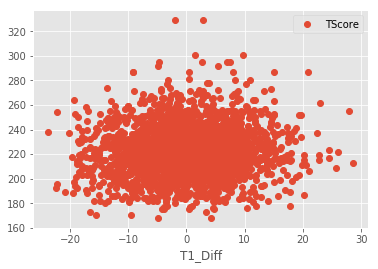

In [149]:
rdf = pd.read_csv("regression_list.csv") 

rdf['T1_Diff'] = rdf.T1_OR5 - rdf.T1_DR5
rdf['T2_Diff'] = rdf.T2_OR5 - rdf.T2_DR5


rdf.T1_OR5 = pd.to_numeric(rdf.T1_OR5)
rdf.T1_DR5 = pd.to_numeric(rdf.T1_DR5)
rdf.T2_OR5 = pd.to_numeric(rdf.T2_OR5)
rdf.T2_DR5 = pd.to_numeric(rdf.T2_DR5)
rdf.T1_Diff = pd.to_numeric(rdf.T1_Diff)

rdf.plot(x='T1_Diff', y='TScore', style='o')  
plt.show()



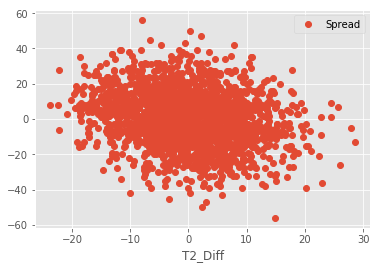

In [122]:
rdf.plot(x='T2_Diff', y='Spread', style='o')  
plt.show()


In [158]:
from pandas import DataFrame
from sklearn import linear_model
import statsmodels.api as sm

X = rdf[['T1_OR5','T1_DR5', 'T2_OR5', 'T2_DR5']] # here we have 2 variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
Y = rdf['Spread']
Y2 = rdf['TScore']

regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

regr2 = linear_model.LinearRegression()
regr2.fit(X, Y2)

print('Intecept_Score: \n', regr2.intercept_)
print('Coefficients_Score: \n', regr2.coef_)


Intercept: 
 0.1968372047350489
Coefficients: 
 [ 0.42950031 -0.40077189 -0.43303045  0.40262237]
Intecept_Score: 
 96.94754180172698
Coefficients_Score: 
 [0.42136938 0.15357508 0.41373199 0.15386099]


In [6]:
team1_input = input('Enter team 1: ')

print(team1_input)

team1 = teams.find_teams_by_full_name(team1_input)[0]['id']

team1_dashboard_adv = teamdashboardbylastngames.TeamDashboardByLastNGames(team_id=team1, season='2019-20', 
                                                                    measure_type_detailed_defense='Advanced', 
                                                                        last_n_games=5, headers=headers)

team1_headers = team1_dashboard_adv.overall_team_dashboard.get_dict().get('headers')
team1_data = team1_dashboard_adv.overall_team_dashboard.get_dict().get('data')[0]

print(team1, '\n', team1_headers[7], team1_data[7], '\n', 
      team1_headers[8], team1_data[8], team1_headers[9], team1_data[9], '\n', 
      team1_headers[10], team1_data[10])

E_OFF1_RATING = team1_data[7]
OFF1_RATING = team1_data[8]
E_DEF1_RATING = team1_data[9]
DEF1_RATING = team1_data[10]

Enter team 1: kings
kings
1610612758 
 E_OFF_RATING 106.3 
 OFF_RATING 106.9 E_DEF_RATING 108.3 
 DEF_RATING 108.7


In [7]:
team2_input = input('Enter team 2: ')
print(team2_input)

team2 = teams.find_teams_by_full_name(team2_input)[0]['id']

team2_dashboard_adv = teamdashboardbylastngames.TeamDashboardByLastNGames(team_id=team2, season='2019-20', 
                                                                    measure_type_detailed_defense='Advanced', 
                                                                        last_n_games=5, headers=headers)

team2_headers = team2_dashboard_adv.overall_team_dashboard.get_dict().get('headers')
team2_data = team2_dashboard_adv.overall_team_dashboard.get_dict().get('data')[0]

print(team2, '\n', team2_headers[7], team2_data[7], '\n', 
      team2_headers[8], team2_data[8], team2_headers[9], team2_data[9], '\n', 
      team2_headers[10], team2_data[10])

E_OFF2_RATING = team2_data[7]
OFF2_RATING = team2_data[8]
E_DEF2_RATING = team2_data[9]
DEF2_RATING = team2_data[10]

Enter team 2: celtics
celtics
1610612738 
 E_OFF_RATING 97.2 
 OFF_RATING 98.8 E_DEF_RATING 95.8 
 DEF_RATING 96.8


In [157]:
# prediction with sklearn
#https://stats.nba.com/team/1610612763/advanced/?Season=2019-20&SeasonType=Regular%20Season&Split=lastn

New_T1_OR5 = 106.9
New_T1_DR5 = 108.7
New_T2_OR5 = 98.8
New_T2_DR5 = 96.8

print('Predicted Spread: \n', regr.predict([[New_T1_OR5 ,New_T1_DR5, New_T2_OR5, New_T2_OR5 ]]))
print('Predicted Over/Under: \n', regr2.predict([[New_T1_OR5 ,New_T1_DR5, New_T2_OR5, New_T2_OR5 ]])) 

# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

Predicted Spread: 
 [-0.45780163]
Predicted Over/Under: 
 [214.76372752]
                            OLS Regression Results                            
Dep. Variable:                 Spread   R-squared:                       0.101
Model:                            OLS   Adj. R-squared:                  0.099
Method:                 Least Squares   F-statistic:                     64.67
Date:                Mon, 25 Nov 2019   Prob (F-statistic):           6.76e-52
Time:                        15:07:34   Log-Likelihood:                -9365.1
No. Observations:                2310   AIC:                         1.874e+04
Df Residuals:                    2305   BIC:                         1.877e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------

In [ ]:
#Theory: If second game of back-to-back is a road game, odds of winning decrease 7-8%, multiply ratings by 0.93.